In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ny_data = pd.read_csv('AB_NYC_2019.csv')
ny_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
ny_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
ny_data.fillna(0, inplace = True)
sum(ny_data.duplicated())

0

In [6]:
ny_data['room_type']

0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
              ...       
48890       Private room
48891       Private room
48892    Entire home/apt
48893        Shared room
48894       Private room
Name: room_type, Length: 48895, dtype: object

In [17]:
# SELECT A PIECE OF DATA TO STAND OUT
explode = (0.1, 0, 0.1, 0) 

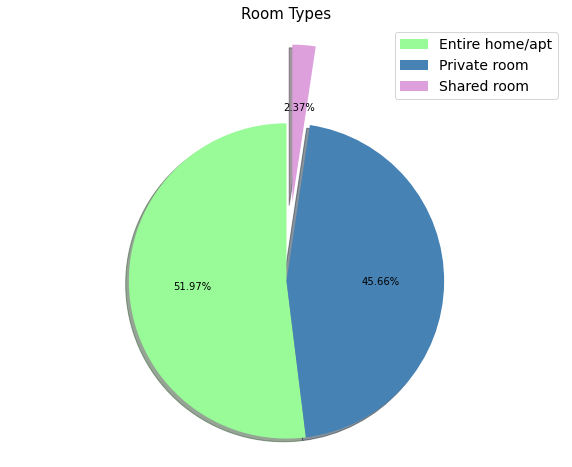

In [8]:
# PLOT ROOM TYPES
room_type = ny_data.groupby('room_type')['latitude'].count().reset_index()
room_type.rename(columns = {'latitude' : 'n_rooms'}, inplace = True)
plt.figure(figsize = (10,8))
plt.pie(room_type['n_rooms'], shadow = True, startangle = 90, explode = (0, 0, 0.5), autopct = '%1.2f%%', colors = ['palegreen', 'steelblue', 'plum'])
plt.axis('equal')
plt.legend(labels = room_type['room_type'], loc = 'best', fontsize = '14')
plt.title('Room Types', fontsize = '15', color = 'black')
plt.show()
plt.close()

C:\Users\Aleksa.COLORADO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


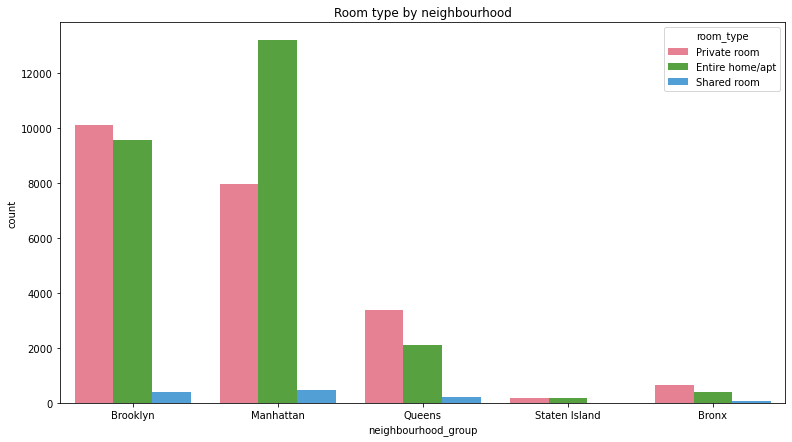

In [19]:
# ROOM TYPE IN EACH NRIGHBOURHOOD
plt.figure(figsize = (13, 7))
plt.title("Room type by neighbourhood")
sns.countplot(ny_data.neighbourhood_group, hue = ny_data.room_type, palette = "husl")
plt.show()